# Análise Exploratória de Dados (EDA)
## Jigsaw Toxic Comment Classification Challenge

Este notebook realiza uma análise exploratória completa dos dados da competição.

In [ ]:
# CÉLULA DE TESTE - Verificar caminhos e arquivos
import os
from pathlib import Path

print("=== DIAGNÓSTICO ===")
print(f"Diretório atual: {os.getcwd()}")
print(f"Arquivo do notebook: {Path.cwd()}")

# Verificar se os dados existem
data_dir = Path('../data/raw')
print(f"\nCaminho dos dados: {data_dir.absolute()}")
print(f"Diretório existe? {data_dir.exists()}")

if data_dir.exists():
    arquivos = list(data_dir.glob('*.csv'))
    print(f"\nArquivos CSV encontrados: {len(arquivos)}")
    for arquivo in arquivos:
        tamanho_mb = arquivo.stat().st_size / (1024*1024)
        print(f"  ✓ {arquivo.name} ({tamanho_mb:.2f} MB)")
else:
    print("\n❌ ERRO: Diretório data/raw não encontrado!")
    print("Verifique se os dados foram baixados corretamente.")
    print("Execute: python download_data.py")

## 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Carregamento dos Dados

In [2]:
# Definir caminhos
data_dir = Path('../data/raw')

# Carregar dados de treino
print("Carregando train.csv...")
train_df = pd.read_csv(data_dir / 'train.csv')
print(f"Shape: {train_df.shape}")

# Carregar dados de teste
print("\nCarregando test.csv...")
test_df = pd.read_csv(data_dir / 'test.csv')
print(f"Shape: {test_df.shape}")

# Carregar sample submission
print("\nCarregando sample_submission.csv...")
sample_submission = pd.read_csv(data_dir / 'sample_submission.csv')
print(f"Shape: {sample_submission.shape}")

Carregando train.csv...
Shape: (159571, 8)

Carregando test.csv...
Shape: (153164, 2)

Carregando sample_submission.csv...
Shape: (153164, 7)


## 3. Primeira Visualização dos Dados

In [3]:
print("=== DADOS DE TREINO ===")
print(f"\nPrimeiras linhas:")
display(train_df.head())

print(f"\nInformações sobre o dataset:")
print(train_df.info())

print(f"\nEstatísticas descritivas:")
display(train_df.describe())

=== DADOS DE TREINO ===

Primeiras linhas:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0



Informações sobre o dataset:
<class 'pandas.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   id             159571 non-null  str  
 1   comment_text   159571 non-null  str  
 2   toxic          159571 non-null  int64
 3   severe_toxic   159571 non-null  int64
 4   obscene        159571 non-null  int64
 5   threat         159571 non-null  int64
 6   insult         159571 non-null  int64
 7   identity_hate  159571 non-null  int64
dtypes: int64(6), str(2)
memory usage: 9.7 MB
None

Estatísticas descritivas:


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print("=== DADOS DE TESTE ===")
print(f"\nPrimeiras linhas:")
display(test_df.head())

print(f"\nInformações sobre o dataset:")
print(test_df.info())

=== DADOS DE TESTE ===

Primeiras linhas:


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.



Informações sobre o dataset:
<class 'pandas.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            153164 non-null  str  
 1   comment_text  153164 non-null  str  
dtypes: str(2)
memory usage: 2.3 MB
None


## 4. Análise das Colunas de Toxicidade

In [5]:
# Identificar colunas de toxicidade
toxic_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print("Colunas de toxicidade:", toxic_cols)
print(f"\nTotal de colunas no dataset: {len(train_df.columns)}")
print(f"Colunas: {list(train_df.columns)}")

Colunas de toxicidade: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Total de colunas no dataset: 8
Colunas: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [6]:
# Estatísticas das colunas de toxicidade
print("=== ESTATÍSTICAS DAS CLASSES DE TOXICIDADE ===")
toxic_stats = train_df[toxic_cols].describe()
display(toxic_stats)

print("\n=== CONTAGEM DE COMENTÁRIOS POR CLASSE ===")
for col in toxic_cols:
    count = train_df[col].sum()
    pct = (count / len(train_df)) * 100
    print(f"{col:20s}: {count:6d} ({pct:5.2f}%)")

=== ESTATÍSTICAS DAS CLASSES DE TOXICIDADE ===


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



=== CONTAGEM DE COMENTÁRIOS POR CLASSE ===
toxic               :  15294 ( 9.58%)
severe_toxic        :   1595 ( 1.00%)
obscene             :   8449 ( 5.29%)
threat              :    478 ( 0.30%)
insult              :   7877 ( 4.94%)
identity_hate       :   1405 ( 0.88%)


## 5. Visualizações - Distribuição das Classes

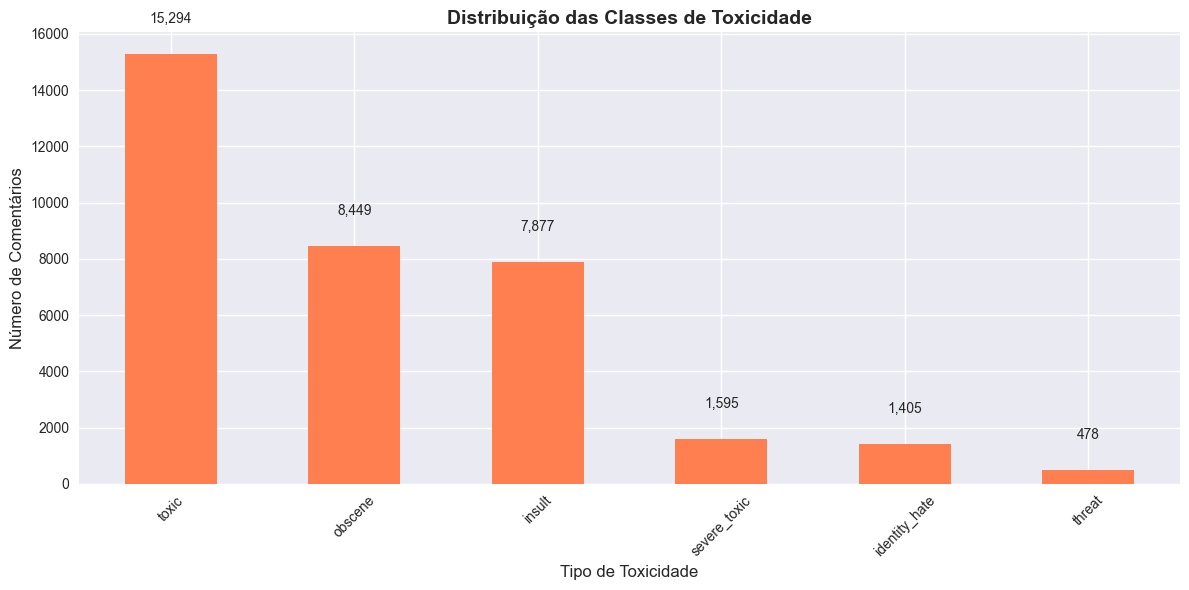

In [7]:
# Gráfico de barras com a contagem de cada classe
fig, ax = plt.subplots(figsize=(12, 6))

counts = train_df[toxic_cols].sum().sort_values(ascending=False)
counts.plot(kind='bar', ax=ax, color='coral')
ax.set_title('Distribuição das Classes de Toxicidade', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Toxicidade', fontsize=12)
ax.set_ylabel('Número de Comentários', fontsize=12)
ax.tick_params(axis='x', rotation=45)

# Adicionar valores nas barras
for i, v in enumerate(counts):
    ax.text(i, v + 1000, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

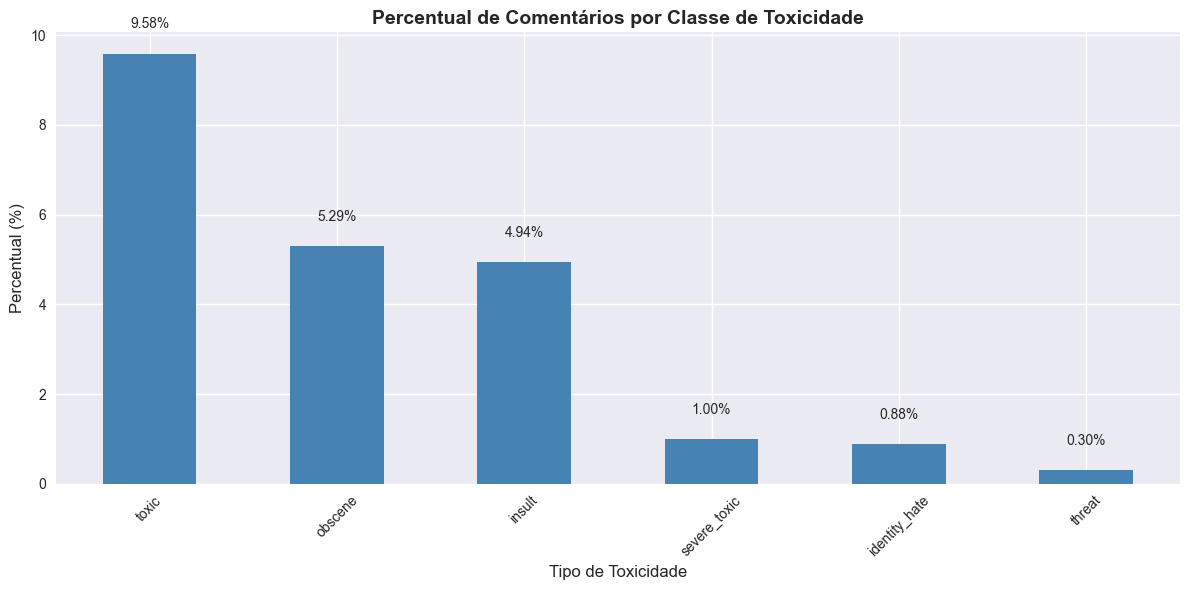

In [8]:
# Gráfico de porcentagem
fig, ax = plt.subplots(figsize=(12, 6))

percentages = (train_df[toxic_cols].sum() / len(train_df) * 100).sort_values(ascending=False)
percentages.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Percentual de Comentários por Classe de Toxicidade', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Toxicidade', fontsize=12)
ax.set_ylabel('Percentual (%)', fontsize=12)
ax.tick_params(axis='x', rotation=45)

# Adicionar valores nas barras
for i, v in enumerate(percentages):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 6. Análise de Comentários Múltiplas Classes

In [9]:
# Contar quantas classes cada comentário tem
train_df['num_classes'] = train_df[toxic_cols].sum(axis=1)

print("=== DISTRIBUIÇÃO DO NÚMERO DE CLASSES POR COMENTÁRIO ===")
class_distribution = train_df['num_classes'].value_counts().sort_index()
print(class_distribution)

print(f"\nComentários sem toxicidade (0 classes): {class_distribution.get(0, 0):,}")
print(f"Comentários com pelo menos 1 classe: {(train_df['num_classes'] > 0).sum():,}")
print(f"Comentários com múltiplas classes (2+): {(train_df['num_classes'] >= 2).sum():,}")

=== DISTRIBUIÇÃO DO NÚMERO DE CLASSES POR COMENTÁRIO ===
num_classes
0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64

Comentários sem toxicidade (0 classes): 143,346
Comentários com pelo menos 1 classe: 16,225
Comentários com múltiplas classes (2+): 9,865


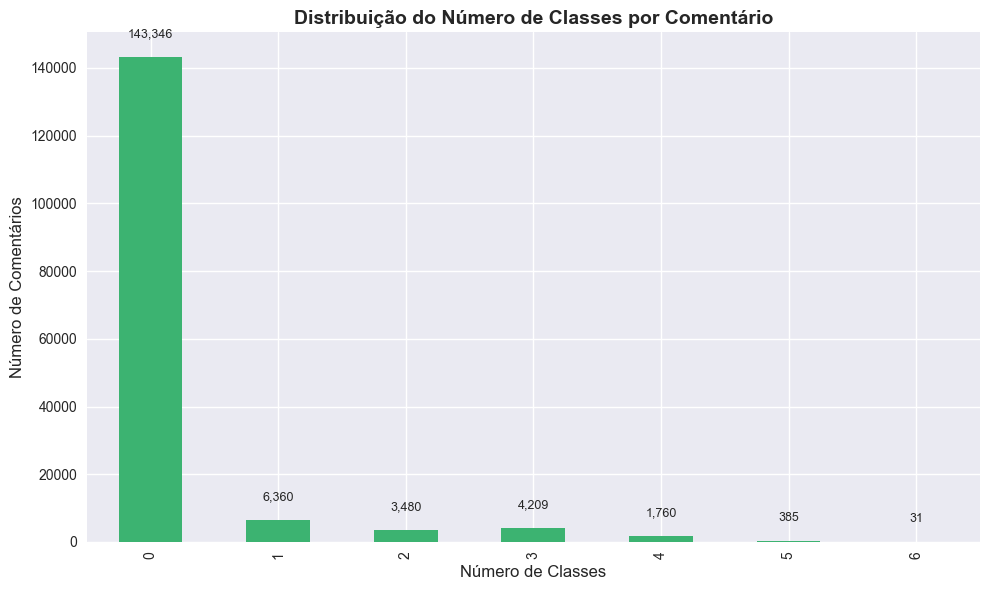

In [10]:
# Visualização da distribuição
fig, ax = plt.subplots(figsize=(10, 6))

class_distribution.plot(kind='bar', ax=ax, color='mediumseagreen')
ax.set_title('Distribuição do Número de Classes por Comentário', fontsize=14, fontweight='bold')
ax.set_xlabel('Número de Classes', fontsize=12)
ax.set_ylabel('Número de Comentários', fontsize=12)

# Adicionar valores nas barras
for i, v in enumerate(class_distribution):
    ax.text(i, v + 5000, f'{int(v):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 7. Análise de Correlação entre Classes

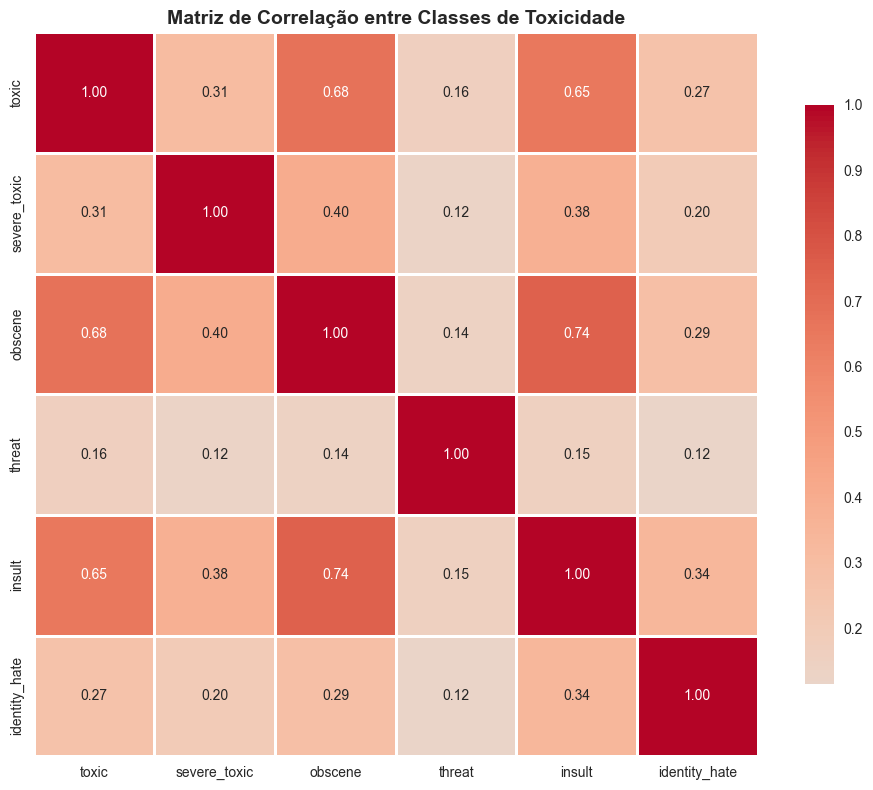

In [11]:
# Matriz de correlação
correlation_matrix = train_df[toxic_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Matriz de Correlação entre Classes de Toxicidade', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Análise do Texto dos Comentários

In [12]:
# Estatísticas básicas sobre o texto
train_df['comment_length'] = train_df['comment_text'].str.len()
train_df['word_count'] = train_df['comment_text'].str.split().str.len()

print("=== ESTATÍSTICAS DO TEXTO ===")
print(f"Comprimento médio dos comentários: {train_df['comment_length'].mean():.0f} caracteres")
print(f"Comprimento mediano dos comentários: {train_df['comment_length'].median():.0f} caracteres")
print(f"Número médio de palavras: {train_df['word_count'].mean():.1f} palavras")
print(f"Número mediano de palavras: {train_df['word_count'].median():.1f} palavras")
print(f"\nComentário mais curto: {train_df['comment_length'].min()} caracteres")
print(f"Comentário mais longo: {train_df['comment_length'].max()} caracteres")

=== ESTATÍSTICAS DO TEXTO ===
Comprimento médio dos comentários: 394 caracteres
Comprimento mediano dos comentários: 205 caracteres
Número médio de palavras: 67.3 palavras
Número mediano de palavras: 36.0 palavras

Comentário mais curto: 6 caracteres
Comentário mais longo: 5000 caracteres


In [1]:
# Distribuição do comprimento dos comentários
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma do comprimento
axes[0].hist(train_df['comment_length'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribuição do Comprimento dos Comentários', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Número de Caracteres', fontsize=10)
axes[0].set_ylabel('Frequência', fontsize=10)
axes[0].axvline(train_df['comment_length'].mean(), color='red', linestyle='--', 
                label=f'Média: {train_df["comment_length"].mean():.0f}')
axes[0].legend()

# Histograma do número de palavras
axes[1].hist(train_df['word_count'], bins=50, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribuição do Número de Palavras', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Número de Palavras', fontsize=10)
axes[1].set_ylabel('Frequência', fontsize=10)
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', 
                label=f'Média: {train_df["word_count"].mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

## 9. Exemplos de Comentários

In [14]:
# Exemplos de comentários não tóxicos
print("=== EXEMPLOS DE COMENTÁRIOS NÃO TÓXICOS ===")
non_toxic = train_df[train_df['num_classes'] == 0]
for idx, row in non_toxic.head(3).iterrows():
    print(f"\nID: {row['id']}")
    print(f"Texto: {row['comment_text'][:200]}...")
    print("-" * 80)

=== EXEMPLOS DE COMENTÁRIOS NÃO TÓXICOS ===

ID: 0000997932d777bf
Texto: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove th...
--------------------------------------------------------------------------------

ID: 000103f0d9cfb60f
Texto: D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)...
--------------------------------------------------------------------------------

ID: 000113f07ec002fd
Texto: Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the...
--------------------------------------------------------------------------------


In [15]:
# Exemplos de comentários tóxicos
print("=== EXEMPLOS DE COMENTÁRIOS TÓXICOS ===")
toxic = train_df[train_df['num_classes'] > 0]
for idx, row in toxic.head(3).iterrows():
    print(f"\nID: {row['id']}")
    classes = [col for col in toxic_cols if row[col] == 1]
    print(f"Classes: {', '.join(classes)}")
    print(f"Texto: {row['comment_text'][:200]}...")
    print("-" * 80)

=== EXEMPLOS DE COMENTÁRIOS TÓXICOS ===

ID: 0002bcb3da6cb337
Classes: toxic, severe_toxic, obscene, insult
Texto: COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK...
--------------------------------------------------------------------------------

ID: 0005c987bdfc9d4b
Classes: toxic
Texto: Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIA...
--------------------------------------------------------------------------------

ID: 0007e25b2121310b
Classes: toxic
Texto: Bye! 

Don't look, come or think of comming back! Tosser....
--------------------------------------------------------------------------------


## 10. Resumo e Conclusões

In [16]:
print("=== RESUMO DA ANÁLISE EXPLORATÓRIA ===")
print(f"\n1. Dataset de Treino:")
print(f"   - Total de comentários: {len(train_df):,}")
print(f"   - Comentários não tóxicos: {(train_df['num_classes'] == 0).sum():,} ({(train_df['num_classes'] == 0).sum()/len(train_df)*100:.2f}%)")
print(f"   - Comentários tóxicos: {(train_df['num_classes'] > 0).sum():,} ({(train_df['num_classes'] > 0).sum()/len(train_df)*100:.2f}%)")

print(f"\n2. Distribuição das Classes:")
for col in toxic_cols:
    count = train_df[col].sum()
    pct = (count / len(train_df)) * 100
    print(f"   - {col:20s}: {count:6,} ({pct:5.2f}%)")

print(f"\n3. Características do Texto:")
print(f"   - Comprimento médio: {train_df['comment_length'].mean():.0f} caracteres")
print(f"   - Palavras médias: {train_df['word_count'].mean():.1f} palavras")

print(f"\n4. Dataset de Teste:")
print(f"   - Total de comentários: {len(test_df):,}")

print("\n=== PRÓXIMOS PASSOS ===")
print("1. Pré-processamento de texto")
print("2. Feature engineering")
print("3. Treinamento de modelos")
print("4. Avaliação e otimização")

=== RESUMO DA ANÁLISE EXPLORATÓRIA ===

1. Dataset de Treino:
   - Total de comentários: 159,571
   - Comentários não tóxicos: 143,346 (89.83%)
   - Comentários tóxicos: 16,225 (10.17%)

2. Distribuição das Classes:
   - toxic               : 15,294 ( 9.58%)
   - severe_toxic        :  1,595 ( 1.00%)
   - obscene             :  8,449 ( 5.29%)
   - threat              :    478 ( 0.30%)
   - insult              :  7,877 ( 4.94%)
   - identity_hate       :  1,405 ( 0.88%)

3. Características do Texto:
   - Comprimento médio: 394 caracteres
   - Palavras médias: 67.3 palavras

4. Dataset de Teste:
   - Total de comentários: 153,164

=== PRÓXIMOS PASSOS ===
1. Pré-processamento de texto
2. Feature engineering
3. Treinamento de modelos
4. Avaliação e otimização
